In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datascience import Table

In [14]:
# Import `fake_or_real_news.csv` 

raw_table = Table.read_table("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")
raw_table.drop("Unnamed: 0");

In [15]:
print("Rows: ",raw_table.num_rows, "Columns: ", raw_table.num_columns)

Rows:  6335 Columns:  4


In [16]:
display(raw_table)

Unnamed: 0,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the F ...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Political Sui ...,Google Pinterest Digg Linkedin Reddit Stumbleupon Print ...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Monday that h ...,REAL
10142,Bernie supporters on Twitter erupt in anger against the ...,"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson ...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary C ...,REAL
6903,"Tehran, USA","I’m not an immigrant, but my grandparents are. More t ...",FAKE
7341,Girl Horrified At What She Watches Boyfriend Do After He ...,"Share This Baylee Luciani (left), Screenshot of what Bay ...",FAKE
95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Jewish child ...,REAL
4869,Fact check: Trump and Clinton at the 'commander-in-chief ...,Hillary Clinton and Donald Trump made some inaccurate cl ...,REAL
2909,Iran reportedly makes new push for uranium concessions i ...,Iranian negotiators reportedly have made a last-ditch pu ...,REAL


In [17]:
print(raw_table["text"][0])

Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is being warned that the entire left

In [19]:
table=Table().with_column("label",raw_table["label"],
                          "text_length",[len(x) for x in raw_table["text"]],
                          "title_length",[len(x) for x in raw_table["title"]])
display(table)

label,text_length,title_length
FAKE,7518,28
FAKE,2646,85
REAL,2543,43
FAKE,2660,84
REAL,1840,48
FAKE,13333,11
FAKE,3171,73
REAL,783,33
REAL,13863,63
REAL,4296,71


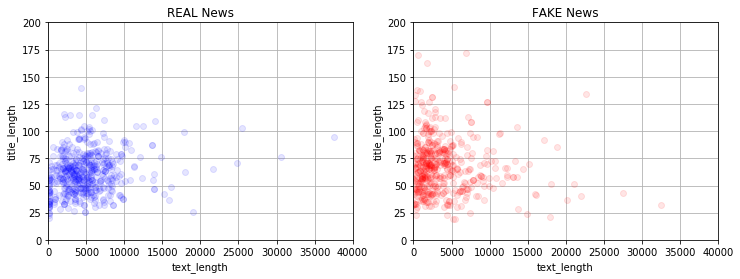

In [20]:
labels = ["REAL","FAKE"]
styles = ["bo","ro"]
terms  = ["text_length","title_length"]
plt.figure(figsize=[12,4])
for i,l in enumerate(labels):
    sub_table = table.where("label",l).sample(500)
    plt.subplot(1,2,i+1)
    plt.plot(sub_table[terms[0]],sub_table[terms[1]],styles[i],alpha=0.1);
    plt.xlim(0,40000)
    plt.ylim(0,200)
    plt.xlabel(terms[0])
    plt.ylabel(terms[1])
    plt.grid(True)
    plt.title(l+" News")

In [21]:
display(table.group("label",np.mean))

label,text_length mean,title_length mean
FAKE,4121.05,69.1808
REAL,5292.16,61.3832


In [ ]:
terms=["Hillary","Trump"]
table=Table().with_column("label",raw_table["label"])
table=table.with_columns({term: np.char.count(raw_table["text"],term) for term in terms})

In [ ]:
labels = ["REAL","FAKE"]
styles = ["bo","ro"]
plt.figure(figsize=[12,4])
for i,l in enumerate(labels):
    sub_table = table.where("label",l).sample(500)
    plt.subplot(1,2,i+1)
    plt.plot(sub_table[terms[0]],sub_table[terms[1]],styles[i],alpha=0.1);
    plt.xlim(-0.5,50)
    plt.ylim(-0.5,50)
    plt.xlabel(terms[0])
    plt.ylabel(terms[1])
    plt.grid(True)
    plt.title(l+" News")


In [ ]:
display(table.group("label",np.mean))